(ECNL)=

# 3.4 Ecuaciones no lineales

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker y `<versión imagen de docker>` por la versión más actualizada que se presenta en la documentación.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -d palmoreck/jupyterlab_optimizacion:<versión imagen de docker>`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion:<versión imagen de docker>` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion).

```

---

Nota generada a partir de [liga1](https://www.dropbox.com/s/dfwk0y04ksgfilv/3.5.Aplicaciones_del_algebra_lineal_numerica.pdf?dl=0), [liga2](https://www.dropbox.com/s/6zree47e1u3p5wx/Ecuaciones_no_lineales.pdf?dl=0).

```{admonition} Al final de esta nota la comunidad lectora:
:class: tip

* Distinguirá la diferencia entre métodos abiertos y cerrados a partir del método de bisección y método de Newton.

* Conocerá algunos criterios de paro utilizados en métodos iterativos y la importancia de considerar la escala de las variables y la función a la que se le desea calcular sus raíces o ceros.

* Fortalcerá lo revisado en la nota de {ref}`algoritmos de descenso y búsqueda de línea en UCO <ADBLUCO>` al relacionar resolver problemas de optimización sin restricciones con resolver sistemas de ecuaciones no lineales.

* Aprenderá que el método de Newton es un método con convergencia local cuadrática bajo ciertas suposiciones y al que se le deben añadir metodologías para convergencia desde cualquier punto inicial (convergencia global) dando lugar a métodos cuasi-Newton híbridos. 

```

## Sistemas de ecuaciones lineales

Las ecuaciones lineales tienen importantes aplicaciones en todas las áreas de la ciencia. La teoría del álgebra lineal nos permite tener resultados universales de las mismas y son una herramienta importante para aproximaciones a ecuaciones no lineales. Por ejemplo, al considerar pequeñas perturbaciones en un punto, un sistema no lineal puede típicamente aproximarse por un sistema lineal en una vecindad local del punto. Sin embargo, la linearización sólo describe propiedades locales y para un análisis global de problemas no lineales otras técnicas se requieren. Tales métodos comúnmente utilizan esquemas iterativos para gradualmente aproximar la solución.

```{admonition} Definición

En general un sistema de ecuaciones lineal es de la forma: 

$$
\begin{array}{ccc} 
a_{11}x_1 + a_{12}x_2 + \cdots + a_{1n}x_n  &= & b_1 \\ 
a_{21}x_1 + a_{22}x_2 +  \cdots + a_{2n}x_n &= & b_2 \\ 
\vdots & & \\ 
a_{m1}x_1 + a_{m2}x_2 + \cdots + a_{mn}x_n &=& b_m 
\end{array}
$$

donde: las $x_i$'s son las incógnitas y las $a_i$'s y $b_i$'s son constantes conocidas.

Las entradas $a_{ij}$'s son nombradas **coeficientes del sistema** y forman a la **matriz del sistema** $A \in \mathbb{R}^{m \times n}$. El conjunto de $b_i$'s se le nombra **lado derecho del sistema** y forma al **vector de lado derecho** $b \in \mathbb{R}^{m}$. Así, el sistema se escribe como $Ax = b$.

Si todas las $b_i$'s son iguales a $0$ el sistema se le nombra **homogéneo** si no se cumple esto se le nombra **no homogéneo**.

```

La teoría del álgebra lineal nos ayuda a determinar que existen solamente **3 posibilidades para solución del sistema anterior:**

* **Una única solución:** sólo existe uno y sólo un conjunto de valores de $x_i$'s que satisfacen todas las ecuaciones simultáneamente.

* **Ninguna solución:** no existe ningún conjunto de valores de $x_i$'s que satisfacen todas las ecuaciones simultáneamente (el conjunto solución es vacío).

* **Infinitas soluciones:** hay una infinidad de valores distintos de las $x_i$'s que satisfacen todas las ecuaciones simultáneamente.

```{admonition} Definición

En el caso de una o infinitas soluciones el sistema de ecuaciones lineales se nombra consistente o no singular, si no existe solución se nombra inconsistente o singular.

```

```{admonition} Observación
:class: tip

Es sencillo probar que si un sistema tiene más de una solución entonces tiene una infinidad de soluciones. Esto contrasta con sistemas de ecuaciones no lineales donde pueden existir para tales sistemas un número finito de soluciones mayor a uno.

```

### Interpretación geométrica

Resolver un sistema de ecuaciones lineales equivale a encontrar la intersección entre rectas, planos o hiperplanos (2,3 o n dimensiones respectivamente). Por ejemplo para un caso de dos dimensiones se tiene:

<img src="https://dl.dropboxusercontent.com/s/p92z7zlquo1adbm/algebra_lineal_1.jpg?dl=0" heigth="700" width="700">


El inciso a) representa un sistema de ecuaciones lineales sin solución, el inciso b) infinitas soluciones (en el dibujo ligeramente se desplazó hacia abajo una de las rectas para mostrar ambas) y el inciso c) una única solución. 

(ALGSEL)=

### Algoritmos para resolver sistemas de ecuaciones lineales

Existen una gran cantidad de algoritmos para resolver sistemas de ecuaciones lineales. Típicamente se elige el algoritmo de acuerdo a las características de los coeficientes de la matriz del sistema y sus dimensiones. 

### Algoritmos para sistemas triangulares

Son sistemas cuya matriz del sistema es triangular inferior o superior. Un sistema triangular inferior se resuelve con el **método de sustitución hacia delante**. Si es triangular superior se resuelve con el **método de sustitución hacia atrás**.


### Algoritmos para sistemas no triangulares

Para sistemas de ecuaciones lineales más generales (no tienen estructura identificable) se tienen los **métodos iterativos** y **directos o basados en factorizaciones matriciales**.

Entre los directos o basados en factorizaciones matriciales se encuentran:

```{margin}

Ver {ref}`definición <MATRIZSDPOSITIVA>` de una matriz simétrica definida positiva.

```

* Eliminación Gaussiana o factorización LU.
* Factorización de Cholesky (la matriz del sistema debe ser un elemento en $\mathbb{S}^n_{++}$ simétrica positiva definida)
* Factorización QR.
* Descomposición en valores singulares o SVD.

y como ejemplo de los iterativos están:


* Jacobi.
* Gauss-Seidel.
* Gradiente conjugado (la versión que se aplica a matrices del sistema simétricas requiere que tales matrices estén en $\mathbb{S}^n_{++}$).

Ambos métodos: iterativos y directos o basados en factorizaciones matriciales encuentran sistemas de ecuaciones equivalentes a partir de operaciones básicas del álgebra lineal.

```{admonition} Definición

Dos sistemas de ecuaciones lineales son equivalentes si tienen el mismo conjunto solución.

```

### Sistemas de ecuaciones lineales *square*, *underdetermined*, *overdetermined*

Entre las características que definen el problema a resolver y el tipo de algoritmo a usar se encuentran las dimensiones de una matriz.

```{admonition} Definición

Si la matriz del sistema tiene más renglones que columnas, $m > n$, se tiene un sistema ***overdetermined***, si tiene más columnas que renglones, $m < n$, se nombra ***underdetermined*** y si tiene el mismo número de renglones y columnas, $m=n$, se nombra ***square***.

```

Los sistemas de ecuaciones lineales *overdetermined* en general no tienen solución si $b \notin \text{Im}(A)$ con $\text{Im}(A)$ espacio columna de $A$. Por esto se busca resolver un **problema de mínimos cuadrados** de la forma:

$$\displaystyle \min_{x \in \mathbb{R}^n} ||Ax-b||_2$$

con única solución si $A$ es de *rank* completo.

Los sistemas de ecuaciones lineales *underdetermined* pueden tener infinitas soluciones o ninguna solución. En el caso que $A$ sea de *rank* completo el sistema es consistente y se busca resolver el **problema de optimización de mínima norma** :

$$\displaystyle \min_{x \in \mathcal{K}} ||x||_2$$


donde: $\mathcal{K} = \{x \in \mathbb{R}^n | Ax = b\}$ que es interesante para $b \neq 0$ y tiene única solución.


```{margin}

Recuérdese que el producto $x^T Ax$ con $A$ simétrica se le nombra forma cuadrática y es un número en $\mathbb{R}$.

```

```{admonition} Comentarios

* El problema de mínimos cuadrados es un problema convexo no importando si $A$ es o no de *rank* completo pues la forma cuadrática involucra a la expresión $x^TA^TAx$ y $A^TA \in \mathbb{S}^n_+$.

* El problema de optimización a resolver para el caso de sistemas de ecuaciones lineales *underdetermined* y matriz del sistema de *rank* completo también puede escribirse como:

$$\min_{x \in \mathbb{R}^n} ||x||_2$$

$$\text{sujeto a:} Ax = b$$

el cual es un problema de optimización convexa con restricciones (no importando si $A$ es o no de *rank* completo).

* Que un sistema de ecuaciones lineales *underdetermined* pueda tener infinitas soluciones si $A$ es de *rank* completo se sigue por el resultado del álgebra lineal [Rank-nullity theorem](https://en.wikipedia.org/wiki/Rank%E2%80%93nullity_theorem). Con las dimensiones definidas tal resultado se escribe como $n = rank(A) + nullity(A) = m + nullity(A)$ $\therefore nullity(A) = n-m > 0$. Si $x_0 \in \mathbb{R}^n$ es una solución de $Ax=b$ entonces $x_0 + N(A)$ es el conjunto de soluciones de $Ax=b$, donde $x_0 + N(A) = \{x_0 + z | z \in N(A)\}$. 


```

## Ecuaciones no lineales

El problema que queremos resolver es el siguiente: dada $f: \mathbb{R} \rightarrow \mathbb{R}$ encontrar $x^*$ que resuelva la ecuación no lineal $f(x) = 0$. Nos interesa al menos una solución de la ecuación anterior.

```{admonition} Definición

$x^*$ se nombra raíz o cero de $f$.

```

Algunos ejemplos son:

* $e^x+1=0$

* $e^{-x}-x =0$

* $x^2 -4\sin(x)=0$

* $x^3+6x^2+11x-6=0$

* $\sin(x) = 0$.

**Resolvamos con [scipy.optimize.fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html#scipy.optimize.fsolve) algunas de las ecuaciones no lineales anteriores.**

In [1]:
from matplotlib import pyplot as plt
from scipy.optimize import fsolve
import math
import numpy as np

In [2]:
np.set_printoptions(precision=3, suppress=True)

La ecuación no lineal $e^x + 1 = 0$ no tiene solución, su gráfica es la siguiente

In [3]:
t = np.linspace(-1,1,100)

In [4]:
eqn = np.exp(t) + 1

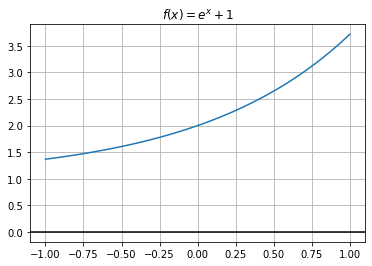

In [5]:
plt.plot(t, eqn)
plt.axhline(color="black")
plt.title("$f(x) = e^x + 1$")
plt.grid()
plt.show()

La ecuación no lineal $e^{-x} - x = 0$ tiene una solución

In [6]:
t = np.linspace(-.25,1,100)

In [7]:
eqn = lambda x: np.exp(-x) - x

```{margin}

Elegimos un punto inicial por ejemplo el $0$.

```

In [8]:
root = fsolve(eqn, 0)
print(root)

[0.567]


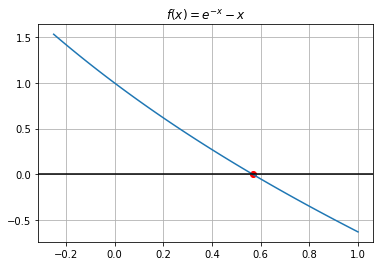

In [9]:
plt.plot(t, eqn(t))
plt.scatter(root, 0, color = "red")
plt.axhline(color="black")
plt.title("$f(x) = e^{-x}-x$")
plt.grid()
plt.show()

La ecuación no lineal $x^2 -4\sin(x)=0$ tiene dos soluciones

In [10]:
t = np.linspace(-5,5,100)

In [11]:
eqn = lambda x: x**2-4*np.sin(x)

```{margin}

Elegimos un punto inicial por ejemplo el $-2$.

```

In [12]:
root = fsolve(eqn, -2)
print(root)

[0.]


```{margin}

Observamos que tenemos dos raíces de $f$.

```

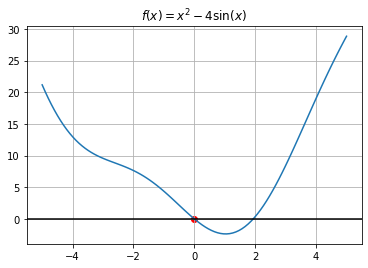

In [13]:
plt.plot(t, eqn(t))
plt.scatter(root, 0, color = "red")
plt.axhline(color="black")
plt.title("$f(x) = x^2-4\sin(x)$")
plt.grid()
plt.show()

```{margin}

Elegimos un punto inicial por ejemplo el $3$.

```

In [14]:
root2 = fsolve(eqn, 3)
print(root2)

[1.934]


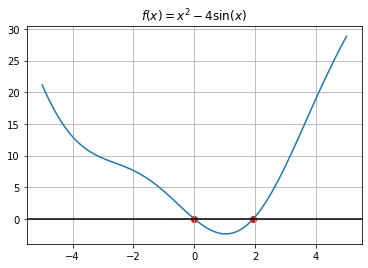

In [15]:
plt.plot(t, eqn(t))
plt.scatter(root, 0, color = "red")
plt.scatter(root2, 0, color = "red")
plt.axhline(color="black")
plt.title("$f(x) = x^2-4\sin(x)$")
plt.grid()
plt.show()

```{margin}

Como ejemplo que no es posible expresar las raíces o ceros por una fórmula cerrada que involucren a los coeficientes, operaciones aritméticas y raíces $\sqrt[n]{\cdot}$, considérese la ecuación no lineal $x^5 - x^2 + 1 = 0$.

```

```{admonition} Comentarios

* En el caso de una ecuación o un sistema de ecuaciones no lineales no tenemos resultados que determinen la existencia o unicidad de soluciones a diferencia de un sistema lineal. Sin embargo, en muchas situaciones en la práctica se resuelven ecuaciones no lineales que sí tienen solución y se desea aproximar una solución o varias soluciones en una región de interés por lo que determinar la existencia o unicidad de la solución no es primordial.

* La mayoría de los métodos para calcular raíces o ceros de $f$ vía la ecuación no lineal $f(x) = 0$ nos devuelven aproximaciones y no fórmulas cerradas. Son métodos **iterativos** que en el caso de $1$ dimensión los podemos dividir en $2$ tipos: **cerrados** y **abiertos**. Los cerrados inician sus iteraciones en un intervalo que encierra a la raíz y conforme avanzan las iteraciones hacen subdivisiones del intervalo inicial por lo que su longitud se reduce y **siempre** convergen. Los abiertos no requieren encerrar a la raíz, en general tienen mejor desempeño que los cerrados en cuanto al número de iteraciones pero **no siempre convergen**.

* Es conveniente comentar que si bien quisiéramos tener algoritmos que calculasen todas las raíces o ceros de $f$ esto no es posible, es un hecho que los métodos nos darán una solución aproximada o un mensaje del tipo "no se encontró solución".

```

(CRITPARO)=

## Criterios de paro, escala de la variable $x$ y de la función $f$

Un tema importante en la implementación de algoritmos es la escala del problema tanto en la variable $x$ como en la función $f$. Por ejemplo, si $x_1$ está en el rango $[10^2, 10^3]$ de metros y $x_2$ está en el rango $[10^{-7}, 10^{-6}]$ de segundos entonces tenemos que realizar un reescalamiento para tener evaluaciones de $f$, criterios de paro y actualizaciones en esquemas iterativos independientes de las escalas de las variables o de la función. Asimismo, los criterios de paro en un método iterativo ayudan a contestar preguntas del tipo ¿hemos resuelto el problema de forma aproximada? ¿en las últimas dos (o un poco más) iteraciones nos hemos quedado virtualmente en el mismo punto? 


```{margin}

El reescalamiento en el ejemplo de kilómetros y microsegundos puede describirse como la multiplicación de una matriz diagonal por las variables $x_1$ y $x_2$ en la que las entradas de la diagonal son $\frac{1}{10^3}$ y $\frac{1}{10^{-6}}$ para las variables $x_1$ y $x_2$ respectivamente.

```

Muchos algoritmos cumplen que son invariantes ante escala de las variables (por ejemplo el método de Newton es invariante en la variable $x$) pero otros métodos no lo son, por lo que al implementar un algoritmo se debe revisar los reescalamientos a realizar. En el ejemplo anterior de los metros y segundos si se cambian las unidades de $x_1$ a kilómetros y las de $x_2$ a microsegundos entonces tanto $x_1$ como $x_2$ se encontrarán en el rango $[10^{-1}, 1]$. Si en dos dimensiones $x_1 \in [10^{6}, 10^{7}]$ y $x_2 \in [10^{-1}, 1]$ entonces una prueba del tipo $||\nabla f(x)|| <  10^{-3}$ no será equilibrada para ambas variables si se desea por ejemplo minimizar $f$ ($x_1$ tendería a ser lo más pequeña posible si por ejemplo tenemos una alta contribución de esta variable en $f$).

En el caso de la función $f$, es común requerir que $f$ o la magnitud de $f$ sea cero (o su derivada). Si consideramos $f(x) = 0$ es muy probable que los errores por redondeo no permitan que se satisfaga esto para ningún punto $x$ por lo que modificamos la condición anterior a $f(x) \approx 0$. También si $f$ no está escalada apropiadamente la condición $|f(x)| < tol$ es probable que siempre o nunca se satisfaga. Por ejemplo si $tol = 10^{-3}$ y $f$ siempre está en $[10^{-7}, 10^{-5}]$ entonces cualquier $x$ satisface $|f(x)| < 10^{-3}$. 

Considerando $f: \mathbb{R}^n \rightarrow \mathbb{R}^n$, dentro de los criterios de paro que se utilizan en los métodos iterativos para resolver ecuaciones no lineales que apuntan a tener una evaluación independiente de la escala se encuentran:

```{margin}

En los criterios de paro que revisan la norma de la derivada de $f$, una opción independiente de la escala de $f$ y $x$ es la cantidad $\frac{||Df(x)||||x||}{||f(x)||}$.

```

* Medir diferencia entre iteraciones. Por ejemplo:

    * $||x^{(k+1)} - x^{(k)}|| < tol(||x^{(k)}|| +1)$
    * $||x^{(k+1)} - x^{(k)}|| < tol\max\{||x^{(k+1)}||, ||x^{(k)}||\}$
    * $||x^{(k+1)} - x^{(k)}|| < tol\max\{||x^{(k+1)}||, \text{user_defined_value}\}$. 

con `user_defined_value` un valor positivo proporcionado por *user* que mide la magnitud típica de $x$ y $|| \cdot ||$ norma.


* Medir la norma de $f$ reescalándola por ejemplo:

$$||Diag f|| < tol$$


con $Diag$ matriz diagonal tal que $Diagf$ tenga norma alrededor de $1$ en puntos no cercanos a la raíz y también puede proveerse sus valores con un `user_defined_value`.
   

* Máximo número de iteraciones.
    


## Métodos para resolver ecuaciones no lineales de funciones $f: \mathbb{R} \rightarrow \mathbb{R}$

### Método de bisección

Es un método cerrado que requiere $f: \rightarrow \mathbb{R}$ con $f \in \mathcal{C}([a,b])$ tal que $f(a) f(b) <0$, esto es, que $f$ tenga un cambio de signo. Por el **teorema del valor intermedio** se cumple que $f$ tiene una raíz en $[a,b]$.

### Algoritmo: método de bisección

> **Dados** $x_i, x_s$ límite inferior y superior respectivamente tales que $x^* \in [x_i, x_s]$ con $f(x_i)f(x_s)<0$ y $tol >0$
>
> **Repetir** el siguiente bloque para $k=1,2,\dots$
>> 1. $x_m = \frac{x_i + x_s}{2}$
>>
>> 2. Si $f(x_i)f(x_m) < 0$ entonces $x^* \in [x_i, x_m]$ por lo tanto $x_s = x_m$.
>>
>> 3. Si $f(x_i)f(x_m) > 0$ entonces $x^* \in [x_m, x_s]$ por lo tanto $x_i = x_m$.
>
> **hasta** convergencia: satisfacer criterio de paro en el que se utiliza $tol$ y $maxiter$.



````{admonition} Comentarios

En el método de bisección:

* Se garantiza que el error relativo en cada iteración se reduce por la mitad y se obtiene una cantidad constante de dígitos por cada iteración, lo cual es representativo de una convergencia lineal.

* Siempre tenemos convergencia pero es lenta.

* No es posible extenderlo a más dimensiones de forma natural pues tendríamos que definir metodologías para elegir puntos en regiones como rectángulos, cubos,... para evaluar a la función $f$ y determinar cambios de signo.

* La evaluación de los pasos 2 y 3 del algoritmo anterior se visualizan respectivamente como sigue:

<img src="https://dl.dropboxusercontent.com/s/sl9m30qmy8cf4rr/bisection_method.png?dl=0" heigth="600" width="600">

en el dibujo $x^{(k)}$ corresponde a $x_m$.

* La implementación del método utiliza lo siguiente:

    * El punto medio se calcula con la expresión: $x_m = x_i + \frac{x_s - x_i}{2}$
    
    * Se revisan los signos de $f(x_i)$, $f(x_m)$ para determinar si $f(x_i)f(x_m) < 0$ o $f(x_i)f(x_m) > 0$.
    
* El criterio de paro es de la forma:

```
while |xi - xs| > tol1(1+|xi|+|xs|) && |f(x_m)| > tol2 && iterations < max_iters
```

con `tol1`, `tol2` cantidades pequeñas y positivas (comúnmente menores o iguales a $10^{-8}$), `iterations` un contador de las iteraciones. En una implementación también pueden utilizarse la medición entre iteraciones con los criterios descritos en {ref}`criterios de paro, escala de la variable x y de la función f <CRITPARO>` y si se tiene conocimiento del valor de $x^*$ se pueden calcular errores relativos de `x_k`, así como los reescalamientos respectivos de $x$ y $f$.

````

```{admonition} Ejercicio
:class: tip

Con el método de bisección aproxima la raíz $x^* \approx 0.56714329$ de la ecuación no lineal $f(x) = e^{-x}-x$ tomando como intervalo inicial $[0,2]$ y un valor de $tol = 10^{-8}$. Crea una tabla de la forma:

|Iter | $x_i$ | $x_s$ | $x^{(k)}$ | Err_rel$(x^{(k)})$|
|:---:|:---:|:---:|:---:|:---:|
|1|0|2|1|1.5 e-2|
|2|0|1|0.5|1.3 e-2|

(valores ejemplo)

```

### Método de Newton o Newton-Raphson 

Es un método abierto que sigue un esquema iterativo de la forma:

$$x^{(k+1)} = x^{(k)} - \frac{f(x^{(k)})}{f'(x^{(k)})}$$

requiere un punto inicial $x^{(0)}$ y converge si se cumplen condiciones descritas en {ref}`comentarios del método de Newton-Raphson <COMENTMETNEWTONRAPSHON>`.

Existen varias formas de obtener tal esquema iterativo, la que se presenta a continuación **define un modelo afín local que aproxima a nuestra función $f$ y encuentra la raíz de tal modelo**, gráficamente:

<img src="https://dl.dropboxusercontent.com/s/hw6fluifowjnpdo/Newton-Raphson_method.png?dl=0" heigth="600" width="600">

El modelo afín en el dibujo anterior es de la forma:

$$M(x) = f(x^{(k)}) + f'(x^{(k)})(x-x^{(k)})$$

E igualando a cero el modelo se tiene:

$$
\begin{eqnarray}
0 &=& M(x) = f(x^{(k)}) + f'(x^{(k)})(x-x^{(k)}) \nonumber \\
&\therefore& x = x^{(k)} - \frac{f(x^{(k)})}{f'(x^{(k)})} \nonumber
\end{eqnarray}
$$

```{admonition} Observación
:class: tip

Obsérvese que el modelo afín anterior $M(x)$ es la aproximación a primer orden dada por el teorema de Taylor.

```

### Ejemplo

Encontrar la raíz de $f(x) = 4x + 5$ con el método de Newton.

In [16]:
import sympy 

```{margin}

Elección del punto inicial.

```

In [17]:
x_0 = -2

```{margin}

Definición de función.
```

In [18]:
x = sympy.Symbol('x')

In [19]:
f = 4*x + 5

```{margin}

Derivada de $f$.

```

In [20]:
df = f.diff()

In [21]:
sympy.pprint(df)

4


```{margin}

Actualización por el método de Newton: $x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$.

```

In [22]:
x_1 = x_0 - f.subs(x, x_0)/df.subs(x, x_0)

In [23]:
sympy.pprint(x_1)

-5/4


### Algoritmo: método de Newton para resolver una ecuación no lineal

> **Dados** $x^{(0)}$ punto inicial, $f: \mathbb{R} \rightarrow \mathbb{R}$ y $tol >0$
>
> $x:=x^{(0)}$.
>
> **Repetir** el siguiente bloque para $k=1,2,\dots$
>> 1. Calcular  la derivada de $f$ y verificar que $f'(x) \neq 0$.
>>
>> 2. Realizar la actualización: $x = x - \frac{f(x)}{f'(x)}$
>
> **hasta** convergencia: satisfacer criterio de paro en el que se utiliza $tol$ y $maxiter$.



### Ejemplo

Aproximar el valor $\sqrt{3}$ con el método de Newton

```{margin}

Elección del punto inicial. ¿Qué pasa si elegimos $x_0 = -10$?

```

In [24]:
x_0 = 10

In [25]:
x_sym = sympy.Symbol('x')

```{margin}

Definimos la función $f(x) = x^2 - 3$

```

In [26]:
f = x_sym**2 - 3

```{margin}

Derivada de $f$.

```

In [27]:
df = f.diff()

In [28]:
sympy.pprint(df)

2⋅x


**Primera iteración**

```{margin}

Actualización por el método de Newton: $x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$.

```

In [29]:
x = x_0 - f.subs(x_sym, x_0)/df.subs(x_sym, x_0)

In [30]:
sympy.pprint(x)

103
───
 20


In [31]:
sympy.pprint(x.evalf())

5.15000000000000


**Segunda iteración**

```{margin}

Actualización por el método de Newton: $x_2 = x_1 - \frac{f(x_1)}{f'(x_1)}$.

```

In [32]:
x = x - f.subs(x_sym, x)/df.subs(x_sym, x)

In [33]:
sympy.pprint(x)

11809
─────
 4120


In [34]:
sympy.pprint(x.evalf())

2.86626213592233


**Tercera iteración**

```{margin}

Actualización por el método de Newton: $x_3 = x_2 - \frac{f(x_2)}{f'(x_2)}$.

```

In [35]:
x = x - f.subs(x_sym, x)/df.subs(x_sym, x)

In [36]:
sympy.pprint(x)

190375681
─────────
 97306160


In [37]:
sympy.pprint(x.evalf())

1.95646073177690


**...**

**Séptima iteración**

In [38]:
x_7 = 1.73205080756888

In [39]:
from pytest import approx
import math

In [40]:
print(x_7 == approx(math.sqrt(3)))

True


(COMENTMETNEWTONRAPSHON)=

````{admonition} Comentarios

* El modelo afín anterior $M(x) = f(x^{(k)}) + f'(x^{(k)})(x-x^{(k)})$ es también nombrado **modelo lineal**.

* Si la función $f$ es lineal el método de Newton converge en una iteración.

* La convergencia del método de Newton en una dimensión converge de forma cuadrática, esto es, el número de dígitos de precisión en cada iteración se duplica si se satisfacen las siguientes condiciones:

    * El punto inicial $x^{(0)}$ es cercano a la raíz $x^*$ de $f$.
    * $f'(x^*) \neq 0$ y existe un conjunto abierto $\mathcal{D}$ en el que $f'(x) \neq 0$ $\forall x \in \mathcal{D}$, $x^* \in \mathcal{D}$ y la segunda derivada de $f$ es acotada en $\mathcal{D}$ \*.

\* La segunda condición referente a la segunda derivada puede ser sustituida por la condición que la primera derivada sea *Lipschitz* continua en $\mathcal{D}$, ver [Lipschitz_continuity](https://en.wikipedia.org/wiki/Lipschitz_continuity). Esto ayuda a acotar la diferencia entre $f$ y el modelo afín $M$. Además evitamos calcular la segunda derivada (que en más dimensiones puede ser complicada de describir) para verificar convergencia.

* El criterio de paro es de la forma:

```
while |x_(k+1) - x_k| > tol1(|x_k| + 1) && |f(x_(k+1))| > tol2 && iterations < max_iters
```

con `tol1`, `tol2` cantidades pequeñas y positivas (comúnmente menores o iguales a $10^{-8}$), `iterations` un contador de las iteraciones. En una implementación también pueden utilizarse la medición entre iteraciones con los criterios descritos en {ref}`criterios de paro, escala de la variable x y de la función f <CRITPARO>` y si se tiene conocimiento del valor de $x^*$ se pueden calcular errores relativos de `x_k`, así como los reescalamientos respectivos de $x$ y $f$.

* En la implementación del método hay que monitorear el valor absoluto de la derivada de $f$.


````

```{admonition} Observaciones
:class: tip

* Si la derivada de $f$ es cero en la raíz no podemos concluir si el método de Newton converge o no y si converge podría o no hacerlo de forma cuadrática.

* Si elegimos un punto inicial lejos de $x^*$ no podemos concluir, el método de Newton podría o no converger.

```

```{admonition} Ejercicio
:class: tip

Para revisar la hipótesis que la derivada de $f$ sea diferente de cero en la raíz y garantice que el método de Newton tenga convergencia cuadrática considérese aproximar la raíz $1$ para las ecuaciones no lineales: 

1.$x^2-1=0$

2.$x^2-2x+1=0$

Realícense $6$ iteraciones del método de Newton para cada ecuación no lineal y háganse conclusiones.

```

```{admonition} Ejercicio
:class: tip

Para revisar la hipótesis que el punto inicial $x^{(0)}$ sea "cercano" a la raíz y garantice que el método de Newton tenga convergencia cuadrática considérese aproximar la raíz $0$ para la ecuación no lineal $\arctan(x) = 0$. Realícense $6$ iteraciones del método de Newton eligiendo un punto $x^{(0)}$ en tres casos:

1.tal que sea en valor absoluto menor a un punto cualquiera en $[1.39, 1.40]$,

2.tal que esté en $[1.39, 1.40]$,

3.tal que en valor absoluto sea mayor a un punto en el intervalo $[1.39, 1.40]$.

y háganse conclusiones.
```

Concerniente a la dependencia de un punto inicial, la convergencia del método de Newton se robustece al incorporar metodologías que permiten su convergencia a una solución **local** desde prácticamente cualquier punto inicial. Tales metodologías resultan en **algoritmos híbridos** en los que se utiliza el método de Newton siempre que funcione bien pero se utiliza otro método (quizás más lento) que garantice convergencia. Uno de éstos es el método de bisección en el que una vez se encuentre "cerca" de una solución se utilice el método de Newton. Otra metodología consiste en lo siguiente: dado que la actualización del método de Newton involucra una dirección en la que el valor absoluto de $f(x)$ **siempre decrece** (al menos en un inicio) entonces se utiliza una forma de *backtracking* si la actualización completa no produce una reducción en $|f(x)|$:


<img src="https://dl.dropboxusercontent.com/s/nllicf8q3xqtew0/quasi_newton_hybrid_method_example.png?dl=0" heigth="400" width="400">


Y se realizaría lo siguiente, definir:

$$x = x^{(k)} - \frac{f(x^{(k)})}{f'(x^{(k)})}$$

y mientras $|f(x)| \geq |f(x^{(k)})|$ calcular:

$$x = \frac{x + x^{(k)}}{2}$$

ver por ejemplo el {ref}`método de búsqueda de línea por backtracking <MBUSLINBACK>` en el contexto de minimización de una función.

El siguiente es un algoritmo en una forma general de algoritmos híbridos [*quasi-Newton*](https://en.wikipedia.org/wiki/Quasi-Newton_method) para resolver una ecuación no lineal.

(ALGMGCNHEN)=

### Algoritmo: método general cuasi-Newton híbrido para resolver una ecuación no lineal

> **Dados** $x^{(0)}$ punto inicial, $f: \mathbb{R} \rightarrow \mathbb{R}$ y $tol >0$
>
> **Repetir** el siguiente bloque para $k=1,2,\dots$
>> 1. Construir un modelo local de $f$ alrededor de $x^{(k)}$ y encontrar el punto $x_N$ que resuelva (o cercanamente resuelva) el modelo del problema.
>>
>> 2. Realizar alguno de los dos pasos siguientes:
>>>
>>> a. Decidir si $x^{(k+1)} = x_N$ si no,
>>>
>>> b. Elegir $x^{(k+1)}$ usando una estrategia global (usar $x_N$ del inciso a. de forma más conservadora).
>
> **hasta** convergencia: satisfacer criterio de paro en el que se utiliza $tol$ y $maxiter$.


donde: $x_N$ es la actualización por el método de Newton en su esquema iterativo.

```{admonition} Comentario

Además de estrategias globales es común que no se tengan disponibles las derivadas de $f$, en este caso las metodologías de diferenciación finita son útiles, ver {ref}`diferenciación numérica por diferencias finitas <DIFNUMDIFFINITAS>`.

```

## Una nota sobre problemas *Unconstrained Optimization* (UO)

En esta sección utilizamos la notación para un problema de optimización sin restricciones de la forma:

$$\displaystyle \min_{x^\in \mathbb{R}^n} f_o(x)$$

y $f_o: \mathbb{R} \rightarrow \mathbb{R}$ es una función objetivo en general que asumimos es de clase $\mathcal{C}^2$ en su dominio.

Así como en ecuaciones no lineales no tenemos resultados que determinen la existencia o unicidad de soluciones, en problemas de optimización sin restricciones esto es similar al plantear la búsqueda de mínimos globales de las funciones objetivo. Lo mejor que podemos obtener son aproximaciones a minimos locales y es prácticamente imposible saber si se ha aproximado un mínimo global.

```{margin}

Por condición necesaria de primer orden recuérdese que si $x^*$ es óptimo entonces $\nabla f_o(x^*) = 0$ que establece un sistema de ecuaciones no lineales en general.

```

Además, en la nota de {ref}`algoritmos de descenso y búsqueda de línea en Unconstrained Convex Optimization (UCO) <ADBLUCO>` se mostró la relación que existe entre resolver problemas tipo UO y ecuaciones no lineales. Es natural entonces aplicar el algoritmo de {ref}`método general cuasi-Newton híbrido para resolver una ecuación no lineal <ALGMGCNHEN>` a la ecuación no lineal de una variable $f_o'(x) = 0$. El esquema iterativo entonces es de la forma:

$$x^{(k+1)} = x^{(k)} - \frac{f_o'(x^{(k)})}{f_o''(x^{(k)})}$$

Recuérdese que tal esquema iterativo se obtiene mediante un modelo afín de $f_o'(x)$ alrededor de $x^{(k)}$, lo cual es equivalente en términos de la función $f_o$ a definir un modelo cuadrático alrededor de $x^{(k)}$ que aproxime a nuestra función $f_o$ y que encuentre la raíz de tal modelo:

$$m(x) = f_o(x^{(k)}) + f_o'(x^{(k)})(x-x^{(k)}) + \frac{1}{2} f_o''(x^{(k)})(x-x^{(k)})^2,$$

con lo que obtendremos el esquema iterativo anterior.

```{admonition} Comentarios

* Un modelo cuadrático es más apropiado que un modelo afín para $f_o$ ya sea para maximización o minimización pues tiene a lo más un punto extremo. 

* Si la función $f_o$ es una función cuadrática el método de Newton converge en una iteración.

* Así como se revisaron las condiciones bajo las cuales el método de Newton converge de forma cuadrática, en el caso de un problema UO se requiere:

    * El punto inicial $x^{(0)}$ sea cercano a la raíz $x^*$ de $f'$.
    * $f''(x^*) \neq 0$ y existe un conjunto abierto $\mathcal{D}$ en el que $f''(x) \neq 0$ $\forall x \in \mathcal{D}$, $x^* \in \mathcal{D}$ y la segunda derivada sea *Lipschitz* continua en $\mathcal{D}$, ver [Lipschitz_continuity](https://en.wikipedia.org/wiki/Lipschitz_continuity). Esto ayuda a acotar la diferencia entre $f$ y el modelo cuadrático $m$. Además evitamos calcular la tercera derivada (que en más dimensiones puede ser complicada de describir) para verificar convergencia.


```

(SISTECNOLINEALES)=

## Sistema de ecuaciones no lineales

El caso de sistema de ecuaciones no lineales es una generalización del caso de una dimensión en el que tenemos $f: \mathbb{R}^n \rightarrow \mathbb{R}^n$ y debemos encontrar una raíz o cero de $f$ que resuelva el sistema de ecuaciones no lineales $f(x) = 0$.

```{admonition} Observación
:class: tip

$f$ tiene $n$ funciones componentes:

$$
f(x) = \left [ \begin{array}{c}
f_1(x) \\
f_2(x) \\
\vdots \\
f_n(x)
\end{array}
\right ]
$$

y su derivada es la matriz de $n \times n$, la Jacobiana $(J(x))_{ij} = \frac{\partial f_i(x)}{\partial x_j}$, ver {ref}`Definición de función, continuidad y derivada <FCD>`.

```

Algunos ejemplos son:

1) $$
\begin{eqnarray}
x_1^2+x_1x_2&=&10 \nonumber \\
x_2 + 3x_1x_2^2&=&57 \nonumber 
\end{eqnarray}
$$

2) $$
\begin{eqnarray}
2=\displaystyle \int_{-1}^{1}1dx &=& w_0 \cdot 1 + w_1\cdot1 \nonumber \\
0 = \displaystyle \int_{-1}^1xdx &=& w_0x_0 + w_1x_1 \nonumber \\
\frac{2}{3} = \displaystyle \int_{-1}^1x^2dx &=& w_0x_0^2 + w_1x_1^2 \nonumber \\
0 = \displaystyle \int_{-1}^1x^3dx &=& w_0x_0^3 + w_1x_1^3 \nonumber \\
\end{eqnarray}
$$

## Método de Newton para ecuaciones no lineales de funciones $f: \mathbb{R}^n \rightarrow \mathbb{R}^n$

El problema que queremos resolver es el siguiente: dada $f: \mathbb{R}^n \rightarrow \mathbb{R}^n$ encontrar $x^* \in \mathbb{R}^n$ que resuelva la ecuación no lineal $f(x) = 0$. Nos interesa al menos una solución de la ecuación anterior. En este problema se **asume** que $f \in \mathcal{C}^1$ en su dominio.

Así como el caso de una dimensión se **define un modelo afín local que aproxima a nuestra función $f$ y encuentra la raíz de tal modelo**. El modelo afín es:

$$M(x) = f(x^{(k)}) + J(x^{(k)})(x-x^{(k)}).$$

```{admonition} Observación
:class: tip

Obsérvese que el modelo afín anterior $M(x)$ es la aproximación a primer orden dada por el teorema de Taylor.

```

Es común reescribir tal modelo como:

$$M(x + v) = f(x) + J(x)v$$

usando $x = x^{(k)} + v$.

La raíz del modelo anterior (igualándolo a cero) conduce a resolver el **sistema de ecuaciones lineales** siguiente:

$$J(x)v = -f(x)$$

y por tanto el esquema iterativo por el método de Newton es:

$$x = x^{(k)} + v.$$

### Algoritmo: método de Newton multidimensional para resolver un sistema de ecuaciones no lineales

> **Dados** $x^{(0)}$ punto inicial, $f: \mathbb{R}^n \rightarrow \mathbb{R}^n$ y $tol >0$.
>
> $x:=x^{(0)}$.
>
> **Repetir** el siguiente bloque para $k=1,2,\dots$
>> 1. Resolver el sistema de ecuaciones lineales $J(x) v = -f(x)$
>>
>> 2. Actualizar: $x = x + v$
>
> **hasta** convergencia: satisfacer criterio de paro en el que se utiliza $tol$ y $maxiter$.



### Ejemplo

Realizar tres iteraciones del método de Newton multidimensional para resolver el siguiente sistema de ecuaciones no lineales:

$$
\begin{eqnarray}
x_1^2+x_1x_2 = 10 \nonumber \\
x_2 + 3x_1x_2^2 = 57 \nonumber
\end{eqnarray}
$$

tomando como punto inicial: $x^{(0)} = \left [ \begin{array}{c} 1.5 \nonumber \\ 3.5 \end{array} \right ]$. La solución es $x^* = \left [ \begin{array}{c} 2 \nonumber \\ 3 \end{array} \right ]$.

Definimos la función $f: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ por:

$$
f(x) = 
\left [
\begin{eqnarray}
x_1^2+x_1x_2 - 10 \nonumber \\
x_2 + 3x_1x_2^2-57 \nonumber 
\end{eqnarray}
\right ]
$$

In [41]:
x1, x2 = sympy.symbols("x1, x2")
x_sym = sympy.Matrix([x1, x2])

```{margin}

Definimos las componentes de $f$: $f_1(x) = x_1^2 + x_1x_2 - 10$ y $f_2(x) = x_2 + 3x_1x_2^2 -57$.

```

In [42]:
f1 = x1**2 + x1*x2 - 10
f2 = x2 + 3*x1*x2**2 - 57
f_sympy = sympy.Matrix([f1, f2])

```{margin}

Esta es la función $f$ a la que le deseamos aproximar la raíz dada en el ejemplo.

```

In [43]:
sympy.pprint(f_sympy)

⎡   2              ⎤
⎢ x₁  + x₁⋅x₂ - 10 ⎥
⎢                  ⎥
⎢       2          ⎥
⎣3⋅x₁⋅x₂  + x₂ - 57⎦


```{margin}

Elección del punto inicial $x^{(0)} = \left [ \begin{array}{c} 1.5 \nonumber \\ 3.5 \end{array} \right ]$.

```

In [44]:
x = np.array([1.5, 3.5])

In [45]:
m = len(f_sympy)
n = len(x_sym)

In [46]:
Jf = f_sympy.jacobian([x1, x2])

```{margin}

Calculamos la Jacobiana de $f$.

```

In [47]:
Jf_eval = lambda x: np.array([partial_derivative.subs({"x1": x[0], 
                                                       "x2": x[1]}) for partial_derivative in Jf],
                              dtype=float).reshape(m,n)

```{margin}

Evaluamos la Jacobiana de $f$ en el punto inicial.

```

In [48]:
print(Jf_eval(x))

[[ 6.5   1.5 ]
 [36.75 32.5 ]]


In [49]:
f_eval = lambda x: np.array([component.subs({"x1": x[0],
                                             "x2": x[1]}) for component in f_sympy],
                            dtype = float)

```{margin}

Evaluamos $f$ en el punto inicial.

```

In [50]:
print(f_eval(x))

[-2.5    1.625]


```{margin}

Para la actualización del método de Newton multidimensional resolvemos el sistema de ecuaciones lineales: $J(x^{(0)}) v = -f(x^{(0)})$

```

In [51]:
v = np.linalg.solve(Jf_eval(x), -f_eval(x))

In [52]:
v

array([ 0.536, -0.656])

```{margin}

Actualización por el método de Newton: $x^{(1)} = x^{(0)} + v$.

```

In [53]:
x = x + v

In [54]:
print(x)

[2.036 2.844]


**Segunda iteración**

```{margin}

Para la actualización del método de Newton multidimensional resolvemos el sistema de ecuaciones lineales: $J(x^{(1)}) v = -f(x^{(1)})$

```

In [55]:
v = np.linalg.solve(Jf_eval(x), -f_eval(x))

In [56]:
v

array([-0.037,  0.158])

```{margin}

Actualización por el método de Newton: $x^{(2)} = x^{(1)} + v$.

```

In [57]:
x = x + v

In [58]:
print(x)

[1.999 3.002]


**Tercera iteración**

```{margin}

Para la actualización del método de Newton multidimensional resolvemos el sistema de ecuaciones lineales: $J(x^{(2)}) v = -f(x^{(2)})$

```

In [59]:
v = np.linalg.solve(Jf_eval(x), -f_eval(x))

In [60]:
v

array([ 0.001, -0.002])

```{margin}

Actualización por el método de Newton: $x^{(3)} = x^{(2)} + v$.

```

In [61]:
x = x + v

In [62]:
print(x)

[2. 3.]


````{admonition} Comentarios

* Si $x^{(0)}$ es cercano a la raíz $x^*$ de $f$, $J(x^*)$ es no singular, no es mal condicionada y $J$ es Lipschitz continua en una vecindad alrededor de $x^*$ entonces el método de Newton multidimensional converge de forma cuadrática a $x^*$.

* Al igual que en el caso de una dimensión, el criterio de paro es de la forma:

```
while ||x_(k+1) - x_k|| > tol1(||x_k|| +1) && ||f(x_(k+1))|| > tol2 && iterations < max_iters
```

con `tol1`, `tol2` cantidades pequeñas y positivas (comúnmente menores o iguales a $10^{-8}$), `iterations` un contador de las iteraciones. En una implementación también pueden utilizarse la medición entre iteraciones con los criterios descritos en {ref}`criterios de paro, escala de la variable x y de la función f <CRITPARO>` y si se tiene conocimiento del valor de $x^*$ se pueden calcular errores relativos de `x_k`, así como los reescalamientos respectivos de $x$ y $f$.

* En la implementación del método hay que monitorear el número de condición de la Jacobiana de $f$.


````

```{admonition} Ejercicio
:class: tip

Aproximar con el método de Newton la solución $x^{*} = \left [ \begin{array}{c} 1 \nonumber \\ 1 \nonumber \\ -\sqrt{\frac{1}{3}} \nonumber \\ \sqrt{\frac{1}{3}}\end{array} \right ]$ del sistema de ecuaciones no lineales con incógnitas $w_0, w_1, x_0, x_1$:

$$
\begin{eqnarray}
2=\displaystyle \int_{-1}^{1}1dx &=& w_0 \cdot 1 + w_1\cdot1 \nonumber \\
0 = \displaystyle \int_{-1}^1xdx &=& w_0x_0 + w_1x_1 \nonumber \\
\frac{2}{3} = \displaystyle \int_{-1}^1x^2dx &=& w_0x_0^2 + w_1x_1^2 \nonumber \\
0 = \displaystyle \int_{-1}^1x^3dx &=& w_0x_0^3 + w_1x_1^3 \nonumber \\
\end{eqnarray}
$$

utilizando el punto inicial: $x^{(0)} = \left [ \begin{array}{c} -1 \nonumber \\ -1 \nonumber \\ -1 \nonumber \\ 1 \end{array} \right ]$.

```

### Ejemplo: componentes principales

```{margin}

El factor $\frac{1}{2}$ se añade para que se anule la constante $2$ al derivar y es equivalente la solución de este problema sin tal factor.

```

El problema de optimización:

$$\displaystyle \max_{v \in \mathbb{R}^n - \{0\}} \frac{1}{2} v^TX^TXv$$

$$\text{sujeto a: } \frac{1}{2}v^Tv = \frac{1}{2}$$

donde: $X \in \mathbb{R}^{m \times n}$ y la variable de optimización es $v$. Es un problema **no convexo** por la restricción cuadrática de igualdad. Tiene solución cerrada dada por: $\sigma_1^2 = \sigma^2_{\text{max}}(X)$, esto es, el cuadrado del máximo valor singular de $X$.

Escribiendo la función Lagrangiana se tiene:

$$\mathcal{L}(v, \nu) = f_o(v) + \nu h(v) = \frac{1}{2} v^T X^T X v + \frac{\nu}{2}\left(1- v^Tv\right)$$


```{admonition} Observación
:class: tip

Es equivalente considerar la restricción $h(v)$ como $1-v^Tv$ o $v^Tv-1$, ver {ref}`ejemplo 1 en introducción a problemas CIEO <EJ1INTROCIEO>` en el sentido que se obtiene la misma solución al problema de optimización.

```


Por tanto, las condiciones de [Karush-Kuhn-Tucker](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions) (KKT) de optimalidad conducen a resolver el siguiente **sistema de ecuaciones no lineales**:

```{margin}
Ver {ref}`comentario relacionado con las condiciones KKT de optimalidad <PRIMERAFORMULACIONCONDKKT>`. Recuérdese son:

$$\begin{eqnarray}
\nabla_x\mathcal{L}(x^*, \nu^*, \lambda^*) &=& 0 \nonumber \\
h_i(x^*) &=& 0 \quad \forall i = 1, \dots, p \nonumber \\
f_i(x^*) &\leq& 0 \quad \forall i = 1, \dots, m \nonumber \\
\lambda_i^* &\geq& 0 \quad \forall i = 1, \dots, m \nonumber \\
\lambda_i^* f_i(x^*) &=& 0 \quad \forall i = 1, \dots, m
\end{eqnarray}
$$
```

$$\begin{eqnarray}
\nabla_v \mathcal{L}(v, \nu) &=& X^TX v - \nu v=0 \nonumber \\
h(v) &=& \frac{1}{2}(1-v^Tv) = 0
\end{eqnarray}
$$

O equivalentemente encontrar la raíz de $f: \mathbb{R}^{n+1} \rightarrow \mathbb{R}^{n+1}$:

$$f(v, \nu) = 
\left [
\begin{array}{c}
X^TX v - \nu v \\
1-v^Tv
\end{array}
\right] = 0
$$


```{admonition} Observación
:class: tip 

Obsérvese que la raíz involucra al vector $(v, \lambda) \in \mathbb{R}^{n+1}$.

```

```{admonition} Comentarios

* Resolver el problema de **optimización numérica** en el contexto de componentes principales:

$$\displaystyle \max_{v \in \mathbb{R}^n - \{0\}} v^TX^TXv$$

$$\text{sujeto a:}$$

$$v^Tv = 1$$

es equivalente a calcular el vector con máxima varianza muestral y la solución al problema anterior es: $\sigma_1^2$, se cumple: $\sigma_1^2 = \max_{v \in \mathbb{R}^n - \{0\}} v^TX^TXv$ sujeto a: $v^Tv=1$. De hecho $v_1 = \text{argmax}_{v \in \mathbb{R}^n - \{0\}} v^TX^TXv$ sujeto a: $v^Tv=1$ donde: $v_1$ es la primera columna de $V$ en la descomposición en valores singulares y se nombra primera dirección principal de $X$. Ver {ref}`Valores, vectores singulares y algoritmos para calcular la SVD <VALVECSINGALGSVD>`. 

* Si $X$ es centrada (la media de cada columna de $X$ es cero), $z_1 = Xv_1$ se nombra primera componente principal de $X$.

* La segunda componente principal $z_2$ es aquella que tiene la máxima varianza muestral entre todas las combinaciones lineales de las columnas de $X$ y que es **ortogonal**, o equivalentemente que tenga covarianza igual a cero, con $z_1$. Este problema se escribe como:

$$\displaystyle \max_{v \in \mathbb{R}^n - \{0\}} v^TX^TXv$$

$$\text{sujeto a:}$$

$$v^Tv = 1$$

$$v^Tv_1 =0$$

La solución al problema anterior está dada por $\sigma_2^2$ que está asociado a $v_2$ la segunda columna de $V$ y $v_2 = \text{argmax}_{v \in \mathbb{R}^n - \{0\}} v^TX^TXv$ sujeto a: $v^Tv=1, v^Tv_1=0$. 

```

```{admonition} Ejercicios
:class: tip

1.Resuelve los ejercicios y preguntas de la nota.
```


**Preguntas de comprehensión.**

1)Escribe las categorías en las que se pueden clasificar los sistemas de ecuaciones lineales. 

2)¿Qué es un método iterativo abierto y qué es uno cerrado? ¿qué diferencias tienen?

3)¿Por qué es indispensable establecer criterios de paro que sean independientes de la escala de los datos?

4)¿Por qué se elige un modelo cuadrático y no un modelo afín para resolver un problema de optimización con el método de Newton?

5)Si queremos utilizar el método de Newton para calcular la raíz de una función $f: \mathbb{R}^n \rightarrow \mathbb{R}^n$ ¿qué tenemos que calcular en una iteración cualquiera?

6)Escribe una relación que existe entre encontrar raíces de ecuaciones no lineales y resolver problemas de optimización.

**Referencias:**

1. C. Meyer, Matrix Analysis and Applied Linear Algebra, SIAM, 2000.

2. J. Dennis, R. B. Schnabel, Numerical Methods for Unconstrained Optimization and Nonlinear Equations, SIAM, 1996.

3. R. Johansson, Numerical Python, Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib, Apress, 2015.


